In [ ]:
# !pip install plotnine
# !pip install plotly

In [62]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
import json
import pandas as pd
import urllib
import plotly.express as px
import requests
from datetime import date

In [6]:
result = requests.get('https://api.covidactnow.org/v2/states.timeseries.json?apiKey=1540d77cf9a0422b88a2d90e989bbd23')

In [7]:
result.status_code

200

In [8]:
state_json = result.json()

In [9]:
state_str = json.dumps(state_json,indent=2)

In [10]:
type(state_json)

list

In [11]:
state_json[0]

{'fips': '02',
 'country': 'US',
 'state': 'AK',
 'county': None,
 'level': 'state',
 'lat': None,
 'locationId': 'iso1:us#iso2:us-ak',
 'long': None,
 'population': 731545,
 'metrics': {'testPositivityRatio': 0.008,
  'testPositivityRatioDetails': {'source': 'other'},
  'caseDensity': 3.5,
  'contactTracerCapacityRatio': 1.84,
  'infectionRate': 0.88,
  'infectionRateCI90': 0.26,
  'icuHeadroomRatio': 0.11,
  'icuHeadroomDetails': {'currentIcuCovid': 5,
   'currentIcuCovidMethod': 'actual',
   'currentIcuNonCovid': 85,
   'currentIcuNonCovidMethod': 'actual'},
  'icuCapacityRatio': 0.69,
  'vaccinationsInitiatedRatio': 0.475,
  'vaccinationsCompletedRatio': 0.413},
 'riskLevels': {'overall': 1,
  'testPositivityRatio': 0,
  'caseDensity': 1,
  'contactTracerCapacityRatio': 0,
  'infectionRate': 0,
  'icuHeadroomRatio': 0,
  'icuCapacityRatio': 0},
 'actuals': {'cases': 70183,
  'deaths': 356,
  'positiveTests': 112922,
  'negativeTests': 2374884,
  'contactTracers': 235,
  'hospitalBe

In [12]:
state_json[1]

{'fips': '01',
 'country': 'US',
 'state': 'AL',
 'county': None,
 'level': 'state',
 'lat': None,
 'locationId': 'iso1:us#iso2:us-al',
 'long': None,
 'population': 4903185,
 'metrics': {'testPositivityRatio': 0.041,
  'testPositivityRatioDetails': {'source': 'other'},
  'caseDensity': 4.3,
  'contactTracerCapacityRatio': 0.38,
  'infectionRate': 0.94,
  'infectionRateCI90': 0.1,
  'icuHeadroomRatio': 0.17,
  'icuHeadroomDetails': {'currentIcuCovid': 73,
   'currentIcuCovidMethod': 'actual',
   'currentIcuNonCovid': 1214,
   'currentIcuNonCovidMethod': 'actual'},
  'icuCapacityRatio': 0.78,
  'vaccinationsInitiatedRatio': 0.372,
  'vaccinationsCompletedRatio': 0.308},
 'riskLevels': {'overall': 1,
  'testPositivityRatio': 1,
  'caseDensity': 1,
  'contactTracerCapacityRatio': 1,
  'infectionRate': 1,
  'icuHeadroomRatio': 0,
  'icuCapacityRatio': 1},
 'actuals': {'cases': 545758,
  'deaths': 11288,
  'positiveTests': 545499,
  'negativeTests': 4122989,
  'contactTracers': 404,
  'hosp

In [13]:
for state_summary in state_json:
     metric=pd.DataFrame(state_summary['metricsTimeseries'])        

In [68]:
metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   testPositivityRatio         448 non-null    float64
 1   caseDensity                 470 non-null    float64
 2   contactTracerCapacityRatio  400 non-null    float64
 3   infectionRate               462 non-null    float64
 4   infectionRateCI90           462 non-null    float64
 5   icuHeadroomRatio            285 non-null    float64
 6   icuCapacityRatio            285 non-null    float64
 7   date                        474 non-null    object 
 8   vaccinationsInitiatedRatio  148 non-null    float64
 9   vaccinationsCompletedRatio  148 non-null    float64
dtypes: float64(9), object(1)
memory usage: 37.2+ KB


In [15]:
type(metric)

pandas.core.frame.DataFrame

In [16]:
if state_summary['metricsTimeseries']:
    metrics=pd.DataFrame(metric[['date','testPositivityRatio','caseDensity','contactTracerCapacityRatio','infectionRate','infectionRateCI90','icuHeadroomRatio','icuCapacityRatio']])

In [17]:
metrics['month-year'] = metrics['date'].str.slice(0,7)

In [18]:
metrics.groupby('month-year').mean()

testPositivityRatio  caseDensity  contactTracerCapacityRatio  \
month-year                                                                 
2020-03                0.050571     0.448387                         NaN   
2020-04                0.041700     2.165517                         NaN   
2020-05                0.032452     2.003226                    0.604762   
2020-06                0.024467     2.956667                    0.783667   
2020-07                0.034065     6.641935                    0.269032   
2020-08                0.030516     6.773333                    0.261667   
2020-09                0.029467    10.776667                    0.200000   
2020-10                0.061548    36.590323                    0.052903   
2020-11                0.124767   110.168966                    0.016207   
2020-12                0.096355    67.038710                    0.029355   
2021-01                0.069419    43.900000                    0.042903   
2021-02                0.038714    16.589286                    0.111786   
2021-03                0.033581    10.874194                    0.161613   
2021-04                0.040000    10.290000                    0.167667   
2021-05                0.045226    12.064516                    0.144194   
2021-06                0.046200    12.012500                    0.145000   

            infectionRate  infectionRateCI90  icuHeadroomRatio  \
month-year                                                       
2020-03          1.290500           0.662500               NaN   
2020-04          0.932000           0.424333               NaN   
2020-05          0.890323           0.430323               NaN   
2020-06          1.124667           0.365667               NaN   
2020-07          1.063548           0.226774               NaN   
2020-08          0.974839           0.213871               NaN   
2020-09          1.194000           0.184667          0.058667   
2020-10          1.188065           0.105161          0.187097   
2020-11          1.075667           0.100000          0.356000   
2020-12          0.863871           0.100000          0.320323   
2021-01          0.905161           0.102258          0.164194   
2021-02          0.880357           0.135714          0.077857   
2021-03          0.962581           0.166452          0.064194   
2021-04          1.010333           0.175333          0.057333   
2021-05          1.014516           0.161290          0.107419   
2021-06          0.967500           0.186250          0.129167   

            icuCapacityRatio  
month-year                    
2020-03                  NaN  
2020-04                  NaN  
2020-05                  NaN  
2020-06                  NaN  
2020-07                  NaN  
2020-08                  NaN  
2020-09             0.356667  
2020-10             0.423871  
2020-11             0.483667  
2020-12             0.457097  
2021-01             0.370645  
2021-02             0.337143  
2021-03             0.305484  
2021-04             0.316000  
2021-05             0.337097  
2021-06             0.379167

In [69]:
for i in state_json:
     actual=pd.DataFrame(i['actualsTimeseries'])     
actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cases                              463 non-null    float64
 1   deaths                             463 non-null    float64
 2   positiveTests                      449 non-null    float64
 3   negativeTests                      449 non-null    float64
 4   contactTracers                     403 non-null    float64
 5   hospitalBeds                       474 non-null    object 
 6   icuBeds                            474 non-null    object 
 7   newCases                           460 non-null    float64
 8   newDeaths                          463 non-null    float64
 9   vaccinesAdministeredDemographics   0 non-null      object 
 10  vaccinationsInitiatedDemographics  0 non-null      object 
 11  date                               474 non-null    object 

In [58]:
if state_summary['actualsTimeseries']:
    actuals=pd.DataFrame(actual[['date','cases','deaths','positiveTests','negativeTests','newCases','newDeaths','vaccinesDistributed','vaccinationsInitiated','vaccinationsCompleted','vaccinesAdministered']])

In [21]:
actuals

date    cases  deaths  positiveTests  negativeTests  newCases  \
0    2020-03-01      NaN     NaN            NaN            NaN       NaN   
1    2020-03-02      NaN     NaN            NaN            NaN       NaN   
2    2020-03-03      NaN     NaN            NaN            NaN       NaN   
3    2020-03-04      NaN     NaN            NaN            NaN       NaN   
4    2020-03-05      NaN     NaN            NaN            NaN       NaN   
..          ...      ...     ...            ...            ...       ...   
469  2021-06-13  61115.0   725.0        52992.0       750547.0       0.0   
470  2021-06-14  61235.0   725.0        53028.0       750944.0     120.0   
471  2021-06-15  61303.0   734.0        53038.0       751012.0      68.0   
472  2021-06-16  61359.0   734.0            NaN            NaN      56.0   
473  2021-06-17      NaN     NaN            NaN            NaN       NaN   

     newDeaths  vaccinesDistributed  vaccinationsInitiated  \
0          NaN                  NaN                    NaN   
1          NaN                  NaN                    NaN   
2          NaN                  NaN                    NaN   
3          NaN                  NaN                    NaN   
4          NaN                  NaN                    NaN   
..         ...                  ...                    ...   
469        0.0             510585.0               220814.0   
470        0.0             510585.0               220895.0   
471        9.0             510585.0               221700.0   
472        0.0             510585.0               221754.0   
473        NaN                  NaN                    NaN   

     vaccinationsCompleted  vaccinesAdministered  
0                      NaN                   NaN  
1                      NaN                   NaN  
2                      NaN                   NaN  
3                      NaN                   NaN  
4                      NaN                   NaN  
..                     ...                   ...  
469               191066.0              408103.0  
470               191169.0              408189.0  
471               192334.0              410113.0  
472               192396.0              410138.0  
473                    NaN                   NaN  

[474 rows x 11 columns]

In [22]:
actuals['month-year'] = actual['date'].str.slice(0,7)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.


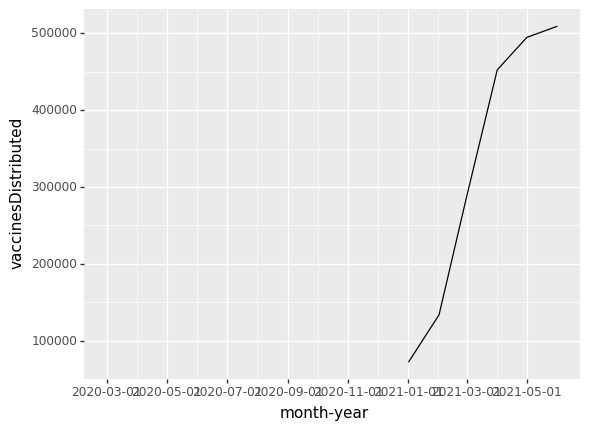

<ggplot: (329639661)>

In [55]:
actual_gb = actuals.groupby('month-year').mean().reset_index()
actual_gb['month-year'] = pd.to_datetime(actual_gb['month-year'])
ggplot(actual_gb)+ geom_line(aes(x='month-year', y='vaccinesDistributed'))

In [24]:
def get_metrics():
    state_json = result.json()
    for state_summary in state_json:
        metrics=pd.DataFrame(state_summary['metricsTimeseries']) 
        metrics['month-year'] = metrics['date'].str.slice(0,7)
        state_chose = state_summary['state']
#         print(state_summary['state'])
        metrics_per_month = metrics.groupby('month-year').mean()
#        print(metrics.groupby('month-year').mean())        

In [25]:
state_json = result.json()
for state_summary in state_json:
    metrics=pd.DataFrame(state_summary['metricsTimeseries']) 
    metrics['month-year'] = metrics['date'].str.slice(0,7)
    state_chose = state_summary['state']
#   print(state_summary['state'])
    metrics_per_month = metrics.groupby('month-year').mean()
#   print(metrics.groupby('month-year').mean())  

In [26]:
metrics_per_month

testPositivityRatio  caseDensity  contactTracerCapacityRatio  \
month-year                                                                 
2020-03                0.050571     0.448387                         NaN   
2020-04                0.041700     2.165517                         NaN   
2020-05                0.032452     2.003226                    0.604762   
2020-06                0.024467     2.956667                    0.783667   
2020-07                0.034065     6.641935                    0.269032   
2020-08                0.030516     6.773333                    0.261667   
2020-09                0.029467    10.776667                    0.200000   
2020-10                0.061548    36.590323                    0.052903   
2020-11                0.124767   110.168966                    0.016207   
2020-12                0.096355    67.038710                    0.029355   
2021-01                0.069419    43.900000                    0.042903   
2021-02                0.038714    16.589286                    0.111786   
2021-03                0.033581    10.874194                    0.161613   
2021-04                0.040000    10.290000                    0.167667   
2021-05                0.045226    12.064516                    0.144194   
2021-06                0.046200    12.012500                    0.145000   

            infectionRate  infectionRateCI90  icuHeadroomRatio  \
month-year                                                       
2020-03          1.290500           0.662500               NaN   
2020-04          0.932000           0.424333               NaN   
2020-05          0.890323           0.430323               NaN   
2020-06          1.124667           0.365667               NaN   
2020-07          1.063548           0.226774               NaN   
2020-08          0.974839           0.213871               NaN   
2020-09          1.194000           0.184667          0.058667   
2020-10          1.188065           0.105161          0.187097   
2020-11          1.075667           0.100000          0.356000   
2020-12          0.863871           0.100000          0.320323   
2021-01          0.905161           0.102258          0.164194   
2021-02          0.880357           0.135714          0.077857   
2021-03          0.962581           0.166452          0.064194   
2021-04          1.010333           0.175333          0.057333   
2021-05          1.014516           0.161290          0.107419   
2021-06          0.967500           0.186250          0.129167   

            icuCapacityRatio  vaccinationsInitiatedRatio  \
month-year                                                 
2020-03                  NaN                         NaN   
2020-04                  NaN                         NaN   
2020-05                  NaN                         NaN   
2020-06                  NaN                         NaN   
2020-07                  NaN                         NaN   
2020-08                  NaN                         NaN   
2020-09             0.356667                         NaN   
2020-10             0.423871                         NaN   
2020-11             0.483667                         NaN   
2020-12             0.457097                         NaN   
2021-01             0.370645                    0.056800   
2021-02             0.337143                    0.125654   
2021-03             0.305484                    0.221516   
2021-04             0.316000                    0.313567   
2021-05             0.337097                    0.354333   
2021-06             0.379167                    0.377437   

            vaccinationsCompletedRatio  
month-year                              
2020-03                            NaN  
2020-04                            NaN  
2020-05                            NaN  
2020-06                            NaN  
2020-07                            NaN  
2020-08                            NaN  
2020-09                            NaN  
2020

In [27]:
def get_actuals():
    state_json = result.json()
    for state_summary in state_json:
        actuals=pd.DataFrame(state_summary['actualsTimeseries']) 
        actuals['month-year'] = actuals['date'].str.slice(0,7)
        print(state_summary['state'])
        print(actuals.groupby('month-year').mean())

In [28]:
get_actuals()

AK
                   cases      deaths  positiveTests  negativeTests  \
month-year                                                           
2020-03        42.550000    0.400000      67.952381   1.949258e+03   
2020-04       274.366667    5.766667     359.833333   1.452803e+04   
2020-05       395.354839    7.838710     516.774194   4.093090e+04   
2020-06       766.766667    9.700000    1026.000000   9.631263e+04   
2020-07      2181.709677   16.000000    3393.516129   2.120073e+05   
2020-08      4995.838710   27.193548    8355.645161   3.733751e+05   
2020-09      7341.100000   42.166667   13021.000000   5.387370e+05   
2020-10     11847.129032   60.967742   23164.193548   7.111801e+05   
2020-11     24034.533333   93.400000   50985.400000   9.469694e+05   
2020-12     41250.064516  165.677419   77845.774194   1.215328e+06   
2021-01     51033.354839  227.935484   89699.225806   1.440064e+06   
2021-02     56170.250000  273.000000   96692.250000   1.653724e+06   
2021-03     60266

                    cases        deaths  positiveTests  negativeTests  \
month-year                                                              
2020-03       1257.086957     49.434783    3528.870968   1.069524e+04   
2020-04      20854.633333   1095.733333   34943.033333   1.087360e+05   
2020-05      34233.258065   2445.096774   57824.096774   2.876425e+05   
2020-06      47891.766667   3036.066667   83910.966667   5.768354e+05   
2020-07      86985.612903   3525.935484  152965.193548   1.075711e+06   
2020-08     136403.645161   4487.129032  220800.709677   1.640921e+06   
2020-09     159264.466667   5264.700000  253101.100000   2.112627e+06   
2020-10     177578.548387   5723.290323  277523.193548   2.620251e+06   
2020-11     207433.366667   6160.133333  309247.333333   3.137356e+06   
2020-12     275266.645161   6939.129032  371646.290323   3.793976e+06   
2021-01     361769.903226   8163.580645  453098.806452   4.476617e+06   
2021-02     418358.821429   9301.035714  486875.107

OR
                    cases       deaths  positiveTests  negativeTests  \
month-year                                                             
2020-02          1.000000     0.000000            NaN            NaN   
2020-03        149.064516     4.161290     178.000000   2.755241e+03   
2020-04       1682.800000    60.966667    2345.366667   4.456423e+04   
2020-05       3499.516129   134.225806    5077.161290   1.264947e+05   
2020-06       6147.200000   180.666667    8584.033333   2.598913e+05   
2020-07      13592.806452   256.322581   17954.193548   4.760625e+05   
2020-08      23017.774194   394.161290   27924.548387   6.964849e+05   
2020-09      30002.533333   515.233333   33540.666667   8.618745e+05   
2020-10      38968.548387   620.806452   44805.064516   1.083854e+06   
2020-11      58393.466667   786.333333   70861.633333   1.412647e+06   
2020-12      96798.741935  1238.677419  107281.322581   1.767834e+06   
2021-01     130640.193548  1748.032258  137822.451613   2.073

In [48]:
state_json = result.json()
for state_summary in state_json:
    actuals=pd.DataFrame(state_summary['actualsTimeseries']) 
    actuals['month-year'] = actuals['date'].str.slice(0,7)
#     actual_state = state_summary['state']
#     gb_actual = actuals.groupby('month-year').mean()
actuals

cases  deaths  positiveTests  negativeTests  contactTracers  \
0        NaN     NaN            NaN            NaN             NaN   
1        NaN     NaN            NaN            NaN             NaN   
2        NaN     NaN            NaN            NaN             NaN   
3        NaN     NaN            NaN            NaN             NaN   
4        NaN     NaN            NaN            NaN             NaN   
..       ...     ...            ...            ...             ...   
469  61115.0   725.0        52992.0       750547.0            50.0   
470  61235.0   725.0        53028.0       750944.0            50.0   
471  61303.0   734.0        53038.0       751012.0            50.0   
472  61359.0   734.0            NaN            NaN            50.0   
473      NaN     NaN            NaN            NaN            50.0   

                                          hospitalBeds  \
0    {'capacity': None, 'currentUsageTotal': None, ...   
1    {'capacity': None, 'currentUsageTotal': None, ...   
2    {'capacity': None, 'currentUsageTotal': None, ...   
3    {'capacity': None, 'currentUsageTotal': None, ...   
4    {'capacity': None, 'currentUsageTotal': None, ...   
..                                                 ...   
469  {'capacity': None, 'currentUsageTotal': None, ...   
470  {'capacity': None, 'currentUsageTotal': None, ...   
471  {'capacity': None, 'currentUsageTotal': None, ...   
472  {'capacity': None, 'currentUsageTotal': None, ...   
473  {'capacity': None, 'currentUsageTotal': None, ...   

                                               icuBeds  newCases  newDeaths  \
0    {'capacity': None, 'currentUsageTotal': None, ...       NaN        NaN   
1    {'capacity': None, 'currentUsageTotal': None, ...       NaN        NaN   
2    {'capacity': None, 'currentUsageTotal': None, ...       NaN        NaN   
3    {'capacity': None, 'currentUsageTotal': None, ...       NaN        NaN   
4    {'capacity': None, 'currentUsageTotal': None, ...       NaN        NaN   
..                                                 ...       ...        ...   
469  {'capacity': None, 'currentUsageTotal': None, ...       0.0        0.0   
470  {'capacity': None, 'currentUsageTotal': None, ...     120.0        0.0   
471  {'capacity': None, 'currentUsageTotal': None, ...      68.0        9.0   
472  {'capacity': None, 'currentUsageTotal': None, ...      56.0        0.0   
473  {'capacity': None, 'currentUsageTotal': None, ...       NaN        NaN   

    vaccinesAdministeredDemographics vaccinationsInitiatedDemographics  \
0                               None                              None   
1                               None                              None   
2                               None                              None   
3                               None                              None   
4                               None                              None   
..                               ...                               ...   
469                             None                              None   
470                             None                              None   
471                             None                              None   
472                             None                              None   
473                             None                              None   

           date  vaccinesDistributed  vaccinationsInitiated  \
0    2020-03-01                  NaN                    NaN   
1    2020-03-02                  NaN                    NaN   
2    2020-03-03                  NaN                    NaN   
3    2020-03-04                  NaN                    NaN   
4    2020-03-05                  NaN                    NaN   
..          ...                  ...                    ...   
469  2021-06-13             510585.0               220814.0   
470  2021-06-14             510585.0               220895.0   
471  2021-06-15             510585.0               221700.0   
4

In [29]:
state_json = result.json()
for state_summary in state_json:
    actuals=pd.DataFrame(state_summary['actualsTimeseries']) 
    actuals['month-year'] = actuals['date'].str.slice(0,7)
    actual_state = state_summary['state']
    gb_actual = actuals.groupby('month-year').mean()

In [35]:
new_gb = gb_actual.reset_index()
new_gb['month-year']= pd.to_datetime(new_gb['month-year'])

In [37]:
new_gb

month-year         cases      deaths  positiveTests  negativeTests  \
0  2020-03-01     36.952381    0.000000       1.000000       0.000000   
1  2020-04-01    366.233333    2.733333     253.033333    5388.366667   
2  2020-05-01    734.838710    9.677419     941.419355   22817.225806   
3  2020-06-01   1123.800000   18.500000    1651.633333   47839.333333   
4  2020-07-01   2063.870968   22.903226    2512.193548   77030.838710   
5  2020-08-01   3301.806452   31.967742    3585.741935  107169.967742   
6  2020-09-01   4668.533333   45.833333    4812.200000  154603.166667   
7  2020-10-01   9007.677419   62.129032    8436.548387  223661.290323   
8  2020-11-01  23276.700000  152.100000   21856.100000  338011.233333   
9  2020-12-01  39976.129032  330.064516   36335.516129  443289.612903   
10 2021-01-01  48686.645161  525.451613   42859.548387  527488.935484   
11 2021-02-01  53260.500000  648.321429   46506.107143  590905.535714   
12 2021-03-01  55375.516129  690.096774   48310.774194  643172.483871   
13 2021-04-01  57205.066667  703.033333   50154.100000  688463.233333   
14 2021-05-01  59201.290323  712.870968   51707.935484  723702.000000   
15 2021-06-01  60876.312500  723.937500   52764.266667  745536.533333   

    contactTracers    newCases  newDeaths  vaccinesDistributed  \
0              NaN    5.761905   0.000000                  NaN   
1              NaN   12.586207   0.233333                  NaN   
2        34.761905   11.096774   0.290323                  NaN   
3        50.000000   19.466667   0.133333                  NaN   
4        50.000000   39.967742   0.193548                  NaN   
5        50.000000   37.466667   0.354839                  NaN   
6        50.000000   70.200000   0.433333                  NaN   
7        50.000000  237.096774   1.193548                  NaN   
8        50.000000  655.551724   4.266667                  NaN   
9        50.000000  358.193548   7.193548                  NaN   
10       50.000000  242.032258   5.096774         72191.666667   
11       50.000000   88.642857   2.678571        133798.653846   
12       50.000000   61.806452   0.935484        287594.032258   
13       50.000000   61.066667   0.233333        452299.666667   
14       50.000000   64.580645   0.387097        494532.666667   
15       50.000000   75.937500   0.937500        509056.250000   

    vaccinationsInitiated  vaccinationsCompleted  vaccinesAdministered  
0                     NaN                    NaN                   NaN  
1                     NaN                    NaN                   NaN  
2                     NaN                    NaN                   NaN  
3                     NaN                    NaN                   NaN  
4                     NaN                    NaN                   NaN  
5                     NaN                    NaN                   NaN  
6                     NaN                    NaN                   NaN  
7                     NaN                    NaN                   NaN  
8                     NaN                    NaN                   NaN  
9                     NaN                    NaN                   NaN  
10           32758.533333            4991.533333          37787.000000  
11           72687.538462           28453.615385         102122.653846  
12          128188.580645           79841.419355         209713.161290  
13          181523.233333          135638.933333         315858.666667  
14          205095.433333          174295.766667         377688.866667  
15          218438.625000          188225.875000         403184.750000

In [38]:
new_gb.dtypes

month-year               datetime64[ns]
cases                           float64
deaths                          float64
positiveTests                   float64
negativeTests                   float64
contactTracers                  float64
newCases                        float64
newDeaths                       float64
vaccinesDistributed             float64
vaccinationsInitiated           float64
vaccinationsCompleted           float64
vaccinesAdministered            float64
dtype: object

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 10 rows containing missing values.


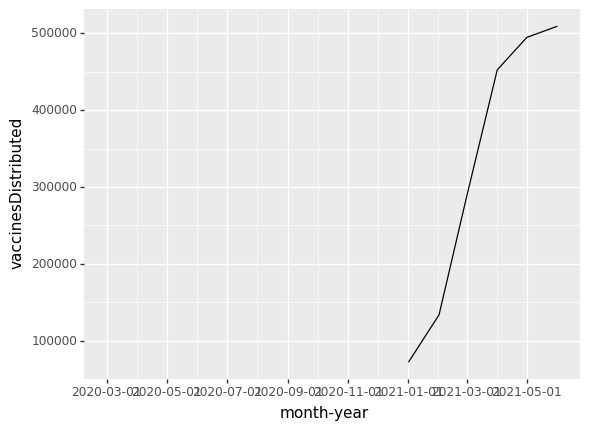

<ggplot: (327371505)>

In [46]:
ggplot(new_gb)+ geom_line(aes(x='month-year', y='vaccinesDistributed'))

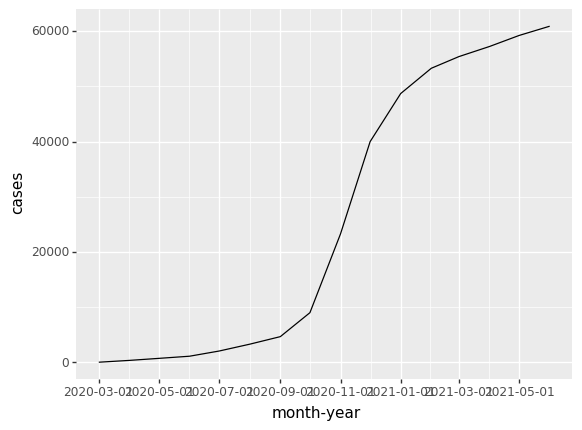

<ggplot: (329752213)>

In [64]:
ggplot(new_gb) + geom_line(aes(x="month-year", y="cases"))


In [67]:
fig = px.line(new_gb, x='month-year', y="cases")
fig.show()
fig1 = px.line(new_gb, x='month-year', y="deaths")
fig1.show()


In [71]:
all_states_df = pd.read_csv("states.timeseries.csv")

all_states_df

date country state  county  fips  lat  long          locationId  \
0      2020-03-01      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
1      2020-03-02      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
2      2020-03-03      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
3      2020-03-04      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
4      2020-03-05      US    AK     NaN     2  NaN   NaN  iso1:us#iso2:us-ak   
...           ...     ...   ...     ...   ...  ...   ...                 ...   
25292  2021-06-11      US    WY     NaN    56  NaN   NaN  iso1:us#iso2:us-wy   
25293  2021-06-12      US    WY     NaN    56  NaN   NaN  iso1:us#iso2:us-wy   
25294  2021-06-13      US    WY     NaN    56  NaN   NaN  iso1:us#iso2:us-wy   
25295  2021-06-14      US    WY     NaN    56  NaN   NaN  iso1:us#iso2:us-wy   
25296  2021-06-15      US    WY     NaN    56  NaN   NaN  iso1:us#iso2:us-wy   

       actuals.cases  actuals.deaths  ...  metrics.infectionRate  \
0                NaN             NaN  ...                    NaN   
1                NaN             NaN  ...                    NaN   
2                NaN             NaN  ...                    NaN   
3                NaN             NaN  ...                    NaN   
4                NaN             NaN  ...                    NaN   
...              ...             ...  ...                    ...   
25292        61115.0           725.0  ...                   0.95   
25293        61115.0           725.0  ...                   0.95   
25294        61115.0           725.0  ...                   0.94   
25295        61235.0           725.0  ...                   0.94   
25296            NaN             NaN  ...                    NaN   

       metrics.infectionRateCI90  metrics.icuHeadroomRatio  \
0                            NaN                       NaN   
1                            NaN                       NaN   
2                            NaN                       NaN   
3                            NaN                       NaN   
4                            NaN                       NaN   
...                          ...                       ...   
25292                       0.19                      0.14   
25293                       0.20                      0.15   
25294                       0.21                       NaN   
25295                       0.22                       NaN   
25296                        NaN                       NaN   

       metrics.icuHeadroomDetails  metrics.icuCapacityRatio  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   
...                           ...                       ...   
25292                         NaN                      0.36   
25293                         NaN                      0.34   
25294                         NaN                       NaN   
25295                         NaN                       NaN   
25296                         NaN                       NaN   

       riskLevels.overall  metrics.vaccinationsInitiatedRatio  \
0                       0                                 NaN   
1                       0                                 NaN   
2                       0                                 NaN   
3                       0                                 NaN   
4                       0                                 NaN   
...                   ...                                 ...   
25292                   2                               0.379   
25293                   2                               0.381   
25294                   2                               0.382   
25295                   2                               0.382   
25296             